# Numpy Exercises

In [1]:
import numpy as np

## Ex 1
Compute the product of two vectors __x, y__ $\in R^n$, i.e. $x^Ty = \sum_{i=1}^{n} x_iy_i$.

In [2]:
def inner_product(x, y):
    x = np.array(x)
    y = np.array(y)
    assert x.shape == y.shape
    return x.dot(y)

**test session:**

In [3]:
x = np.random.rand(10)
y = np.random.rand(10)
res = 0
for x_i, y_i in zip(x, y):
    res += x_i * y_i
assert np.allclose(inner_product(x, y), res)

## Ex 2
Compute the mean-absolute-error between two vectors __x, y__ $\in R^n$, MAE(__x, y__) $\in R^n$, MAE(__x, y__) $= \frac{1}{n}\sum_{i=1}^{n}|{y_i-x_i}|$.

In [4]:
def mean_absolute_error(x, y):
    x = np.array(x)
    y = np.array(y)
    assert x.shape == y.shape
    return np.abs(y - x).mean()

**test session:**

In [5]:
x = np.random.rand(10)
y = np.random.rand(10)
res = 0
for x_i, y_i in zip(x, y):
    res += abs(x_i - y_i)
res /= x.shape[0]
assert np.allclose(mean_absolute_error(x, y), res)

## Ex 3
Implement __lead(x, n)__ and __lag(x, n)__. The former function gets rid of the first $n$ observations in $x$ and adds $n$ missing values at the end of the resulting vector, e.g., __lead( [1, 2, 3, 4, 5], 2) == [3, 4, 5, NaN, NaN]__, i.e., the observations are left-shifted. On the other hand, __lag([1, 2, 3, 4, 5], 2) == [NaN, NaN, 1, 2, 3]__, i.e., we get a right-shift.

In [6]:
def shift(left = True):
    def move(x, n, inplace = False):
        if not inplace:
            x = x[:]
        assert n >= 0
        if left:
            x[ :-n] = x[n: ]
            x[-n: ] = [np.nan] * n
        else:
            x[n: ] = x[ :-n]
            x[ :n] = [np.nan] * n
        return x
    return move

In [7]:
lead = shift(True)
lag = shift(False)

**test session:**

In [8]:
assert lead([1, 2, 3, 4, 5], 2) == [3, 4, 5, np.nan, np.nan]
assert lag([1, 2, 3, 4, 5], 2) == [np.nan, np.nan, 1, 2, 3]

## Ex 4
Assume that an $n\times d$ matrix $\textbf{X}$ represents n points in $R^d$. Write a function that determines the pairwise distances between all the points in $\textbf{X}$ and a given $\textbf{y} \in R^d$, Return a vector $\textbf{d} \in R^n$ with $d_i = ||x_i - y_i||_2$.

In [9]:
def distance(X, y):
    X = np.array(X)
    y = np.array(y)
    assert X.shape[1] == y.shape[0]
    return list(np.linalg.norm(X - y, 2, axis = 1))

**test session:**

In [10]:
X = np.random.rand(10, 5)
y = np.random.rand(5)
assert np.allclose(distance(X, y), np.sqrt(((X - y) ** 2).sum(axis = 1)))

# Pandas Exercises

In [11]:
import pandas as pd

## Ex 1
With the **weather** data frame from **nycflights13**:
- Convert tempreature to Celsius.
- Compute daily mean tempreatures for the **JFK** airport. If some hourly tempreature measurements are missing, linearly interpolate between the proceding and following non-missing data, e.g., a temprature sequence of **[ ..., 10,  NaN, NaN, 40, ... ]** should be transformed to **[ ..., 10, 20, 30, 40, ... ]**.
- Present the daily mean tempratures on a plot. The x-axis labels should be human-redable and intuitive.
- Choose days with greater mean temperature than in the preceeding day.
- Find 5 hottest days.

**Check working directory.**

In [12]:
pwd

'/home/ranger/Documents/Py_Proj/Stat_Class/Assignment_1/Assignment_1_Qitian_Ma_3068020'

**Check file head.**

In [13]:
!head -n 43 'data/nycflights13/nycflights13_weather.csv'

# weather              package:nycflights13              R Documentation
#
# Hourly weather data
#
# Description:
#
#      Hourly meterological data for LGA, JFK and EWR.
#
# Usage:
#
#      weather
#
# Format:
#
#      A data frame with columns
#
#      origin Weather station. Named origin to faciliate merging with
#           ‘flights’ data
#
#      year,month,day,hour Time of recording
#
#      temp,dewp Temperature and dewpoint in F
#
#      humid Relative humidity
#
#      wind_dir,wind_speed,wind_gust Wind direction (in degrees), speed
#           and gust speed (in mph)
#
#      precip Preciptation, in inches
#
#      pressure Sea level pressure in millibars
#
#      visib Visibility in miles
#
#      time_hour Date and hour of the recording as a ‘POSIXct’ date
#
# Source:
#
#      ASOS download from Iowa Environmental Mesonet,
#      https://mesonet.agron.iastate.edu/request/download.phtml.
#
#      Hadley Wickam’s nycflights13-0.2.1 package, see http://cran.r-project.org/packa

**Read in data.**

In [14]:
weather = pd.read_csv('data/nycflights13/nycflights13_weather.csv', skiprows = 42)
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


- **Convert temprature to Celsius.**

In [15]:
weather['temp'] = (weather['temp'] - 32) * 5/9
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,3.3,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,3.3,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,3.3,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


**Filter JFK temprature data.**

In [16]:
JFK = weather[ weather['origin'] == 'JFK' ][['year', 'month', 'day', 'hour', 'temp']]
JFK.head()

,year,month,day,hour,temp
8708,2013,1,1,0,3.3
8709,2013,1,1,1,3.3
8710,2013,1,1,2,3.9
8711,2013,1,1,3,3.9
8712,2013,1,1,4,3.9


**Check missing entries.**

In [17]:
JFK.groupby(['year', 'month', 'day'])['hour'].count()[JFK.groupby(['year','month', 'day'])['hour'].count() != 24]

year  month  day
2013  1      1      23
      2      21     23
      3      5      23
             31     23
      4      3      23
      8      13     23
             16     23
             19     23
             22     23
             23     22
      10     26     19
             27     23
      11     1      22
             3      19
             4      23
Name: hour, dtype: int64

**Create DataFrame of full date.**

In [18]:
YMD = JFK[['year', 'month', 'day']].drop_duplicates()
hour = pd.DataFrame({'hour': range(24), 'year': 2013})
YMDH = pd.merge(YMD, hour, on = 'year')
YMDH.head()

,year,month,day,hour
0,2013,1,1,0
1,2013,1,1,1
2,2013,1,1,2
3,2013,1,1,3
4,2013,1,1,4


**JFK right-joins with YMDH. See line 8711 contains missing data.**

In [19]:
JFK_B = pd.merge(JFK, YMDH, on = ['year', 'month', 'day', 'hour'], how = 'right').sort_values(['year', 'month', 'day', 'hour'])
JFK_B.head(10)

,year,month,day,hour,temp
0,2013,1,1,0,3.3
1,2013,1,1,1,3.3
2,2013,1,1,2,3.9
3,2013,1,1,3,3.9
4,2013,1,1,4,3.9
8711,2013,1,1,5,NaN
5,2013,1,1,6,3.9
6,2013,1,1,7,3.9
7,2013,1,1,8,4.4
8,2013,1,1,9,4.4


**Linearly interpolate missing tempratures. See line 8711 now contains no missing data.**

In [20]:
JFK_B['temp'].interpolate(method = 'linear', inplace = True)
JFK_B.head(10)

,year,month,day,hour,temp
0,2013,1,1,0,3.3
1,2013,1,1,1,3.3
2,2013,1,1,2,3.9
3,2013,1,1,3,3.9
4,2013,1,1,4,3.9
8711,2013,1,1,5,3.9
5,2013,1,1,6,3.9
6,2013,1,1,7,3.9
7,2013,1,1,8,4.4
8,2013,1,1,9,4.4


- **Compute daily mean tempratures.**

In [21]:
Daily_Temp = JFK_B.groupby(['month', 'day'])['temp'].mean().reset_index()
Daily_Temp.head()

,month,day,temp
0,1,1,3.820833
1,1,2,-1.920833
2,1,3,-1.237500
3,1,4,1.129167
4,1,5,2.720833


**Build date index.**

In [22]:
Daily_Temp['idx'] = Daily_Temp.apply(lambda row: pd.to_datetime('2013/' + str(int(row['month'])) + '/' + str(int(row['day'])), format = '%Y/%m/%d'), axis = 1)
Daily_Temp.head()

,month,day,temp,idx
0,1,1,3.820833,2013-01-01
1,1,2,-1.920833,2013-01-02
2,1,3,-1.237500,2013-01-03
3,1,4,1.129167,2013-01-04
4,1,5,2.720833,2013-01-05


In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

- **Present the daily mean tempratures on a plot.**
**Jupyter_Notebook has problems showing axis. Please check saved file.**

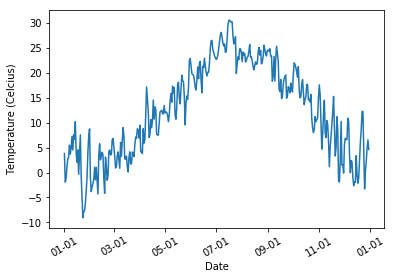

In [24]:
fig,ax1 = plt.subplots()
plt.plot(Daily_Temp['idx'], Daily_Temp['temp'])
plt.xlabel('Date')
plt.ylabel('Temperature (Celcius)')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.xticks(rotation = 30)
plt.savefig('Temp_Plot.png')
plt.show()

- **Choose days with greater mean temperature than in the preceding day.**

In [25]:
Daily_Temp['DIFF'] = Daily_Temp['temp'] - Daily_Temp['temp'].shift(1)
Daily_Temp[ Daily_Temp['DIFF'] > 0].head()

,month,day,temp,idx,DIFF
2,1,3,-1.237500,2013-01-03,0.683333
3,1,4,1.129167,2013-01-04,2.366667
4,1,5,2.720833,2013-01-05,1.591667
5,1,6,3.029167,2013-01-06,0.308333
6,1,7,5.479167,2013-01-07,2.450000


- **Find 5 hottest days.**

In [26]:
Daily_Temp.sort_values('temp', ascending = False)[ :5]

,month,day,temp,idx,DIFF
197,7,17,30.579167,2013-07-17,0.095833
196,7,16,30.483333,2013-07-16,0.970833
200,7,20,30.245833,2013-07-20,0.058333
198,7,18,30.241667,2013-07-18,-0.337500
199,7,19,30.187500,2013-07-19,-0.054167


## Ex 2
In the **flights** table from the **nycflights13** database, select all columns between **year** and **day** (inclusive) without referring to column numbers explicitly (the code should work if we randomly rearrange the columns too). Then select all columns except those between **year** and **day** (inclusive).

**Check working directory.**

In [27]:
pwd

'/home/ranger/Documents/Py_Proj/Stat_Class/Assignment_1/Assignment_1_Qitian_Ma_3068020'

**Check file head.**

In [28]:
!head -n 55 'data/nycflights13/nycflights13_flights.csv'

# flights              package:nycflights13              R Documentation
#
# Flights data
#
# Description:
#
#      On-time data for all flights that departed NYC (i.e. JFK, LGA or
#      EWR) in 2013.
#
# Usage:
#
#      flights
#
# Format:
#
#      Data frame with columns
#
#      year,month,day Date of departure
#
#      dep_time,arr_time Actual departure and arrival times, local tz.
#
#      sched_dep_time,sched_arr_time Scheduled departure and arrival
#           times, local tz.
#
#      dep_delay,arr_delay Departure and arrival delays, in minutes.
#           Negative times represent early departures/arrivals.
#
#      hour,minute Time of scheduled departure broken into hour and
#           minutes.
#
#      carrier Two letter carrier abbreviation. See ‘airlines’ to get
#           name
#
#      tailnum Plane tail number
#
#      flight Flight number
#
#      origin,dest Origin and destination. See ‘airports’ for additional
#           metadata.
#
#      air_time Amount of time 

**Read in data.**

In [29]:
flights = pd.read_csv('data/nycflights13/nycflights13_flights.csv', skiprows = 54)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


**Get the index of min(year, day), max(year, day).**

In [30]:
year_idx = flights.columns.get_loc('year')
day_idx = flights.columns.get_loc('day')

minimum = min(year_idx, day_idx)
maximum = max(year_idx, day_idx)

- **select all columns between year and day (inclusive).**

In [31]:
bet_year_day = flights.iloc[:, minimum : maximum + 1]
bet_year_day.head()

,year,month,day
0,2013,1,1
1,2013,1,1
2,2013,1,1
3,2013,1,1
4,2013,1,1


- **select all columns except those between year and day (inclusive).**

In [32]:
out_year_day = flights.iloc[ :, list( range(minimum) ) + list( range(maximum +1, flights.shape[1]) ) ]
out_year_day.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


## Ex 3
Let A = **some_birth_dates1**, B = **some_birth_dates2**, and C = **some_birth_dates3**. Assume the **name** column can be used as the primary key, i.e., it uniquely identifies each row in the data frame. Deterime A$\cup$B, A$\cup$B$\cup$C, A$\cap$B,  A$\cap$C, A  \  B.

**Check working directory.**

In [33]:
pwd

'/home/ranger/Documents/Py_Proj/Stat_Class/Assignment_1/Assignment_1_Qitian_Ma_3068020'

**Check file head.**

In [34]:
!head -n 5 'data/some_birth_dates1.csv'

"Name","BirthDate"
"Paitoon Ornwimol","26.06.1958"
"Antónia Lata","20.05.1935"
"Bertoldo Mallozzi","17.08.1972"
"Nedeljko Bukv","19.12.1921"


**Read in data.**

In [35]:
A = pd.read_csv('data/some_birth_dates1.csv')
A.head()

,Name,BirthDate
0,Paitoon Ornwimol,26.06.1958
1,Antónia Lata,20.05.1935
2,Bertoldo Mallozzi,17.08.1972
3,Nedeljko Bukv,19.12.1921
4,Micha Kitchen,17.09.1930


In [36]:
B = pd.read_csv('data/some_birth_dates2.csv')
B.head()

,Name,BirthDate
0,Hushang Naigamwala,25.08.1991
1,Zhen Wei,16.11.1975
2,Micha Kitchen,17.09.1930
3,Jodoc Alwin,16.11.1969
4,Igor Mazał,14.05.2004


In [37]:
C = pd.read_csv('data/some_birth_dates3.csv')
C.head()

,Name,BirthDate
0,Jodoc Alwin,16.11.1969
1,Hushang Naigamwala,25.08.1991
2,Zhen Wei,16.11.1975
3,Noe Tae-Woong,11.07.1970
4,Didier Cuvillier,24.04.1938


- **A$\cup$B**

In [38]:
A_OR_B = pd.merge(A, B, on = ['Name', 'BirthDate'], how = 'outer')
A_OR_B.shape

(15, 2)

- **A$\cup$B$\cup$C**

In [39]:
A_OR_B_OR_C = pd.merge(A_OR_B, C, on = ['Name', 'BirthDate'], how = 'outer')
A_OR_B_OR_C.head()

,Name,BirthDate
0,Paitoon Ornwimol,26.06.1958
1,Antónia Lata,20.05.1935
2,Bertoldo Mallozzi,17.08.1972
3,Nedeljko Bukv,19.12.1921
4,Micha Kitchen,17.09.1930


- **A$\cap$B**

In [40]:
A_AND_B = pd.merge(A, B, on = ['Name', 'BirthDate'], how = 'inner')
A_AND_B.head()

,Name,BirthDate
0,Micha Kitchen,17.09.1930
1,Mefodiy Shachar,01.10.1914
2,Paul Meckler,29.09.1968
3,Katarzyna Lasko,20.10.1971
4,Åge Trelstad,07.03.1935


- **A$\cap$C**

In [41]:
A_AND_C = pd.merge(A, C, on = ['Name', 'BirthDate'], how = 'inner')
A_AND_C.head()

,Name,BirthDate


**test session:**

In [42]:
B_AND_C = pd.merge(B, C, on = ['Name', 'BirthDate'], how = 'inner')
assert A_OR_B_OR_C.shape[0] == A.shape[0] + B.shape[0] + C.shape[0] - A_AND_B.shape[0] - B_AND_C.shape[0]

- **A \ B**

In [43]:
A_name = set(A['Name'])
B_name = set(B['Name'])

diff_idx = A['Name'].apply(lambda name: name in (A_name - B_name))

A_DIFF_B = A[diff_idx]
A_DIFF_B.head()

,Name,BirthDate
0,Paitoon Ornwimol,26.06.1958
1,Antónia Lata,20.05.1935
2,Bertoldo Mallozzi,17.08.1972
3,Nedeljko Bukv,19.12.1921


**test session:**

In [44]:
assert A_DIFF_B.shape[0] == A.shape[0] - A_AND_B.shape[0]